# 05.02 - Introducing Scikit-Learn

Scikit-learn is a Python library that provides efficient versions of a large number of common algorithms.

### Data Representation in Scikit-Learn

In this section, we will discuss how data is represented in order to be manipulated by Scikit-learn: the best way to think about data within Scikit-Learn is in terms of tables of data.

### Data as table

Tables are simply two-dimensional representations of data. The rows represent _individual elements_ of the dataset, and the columns represent _quantities related to each of these elements_. 

In [17]:
# example: Iris dataset from seaborn
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In general, we will refer to the rows of the matrix as **samples**, and the number of rows as <code>n_samples</code>.

Likewise,  we will refer to the columns of the matrix as **features**, and the number of columns as <code>n_features</code>.

### Features matrix

This tabular view is what we would usually call a **feature matrix**, and store as a two-dimensional matrix called <code>X</code> with shape <code>[n_samples, n_features]</code>

### Target array

We would also generally work with a **label** or **target array**, which by convention we will usually call <code>y</code>. 

The target array is usually one dimensional, with length <code>n_samples</code>, and is generally contained in a NumPy array or Pandas Series. 

The distinguishing feature of the target array is that it is usually the _quantity we want to predict from the data_, what statistically we would call the **dependent variable**. 

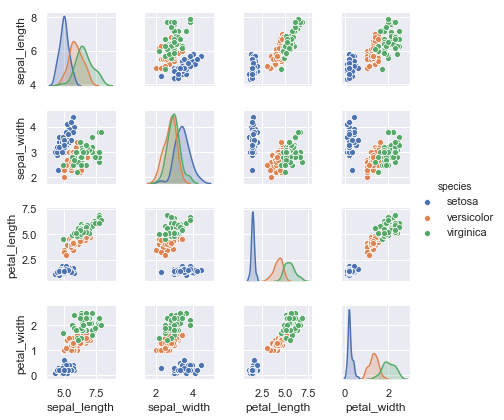

In [18]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [19]:
# extract features matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [20]:
# extract target array
y_iris = iris['species']
y_iris.shape

(150,)

### Scikit-Learn's Estimator API

Scikit-learn guiding principles:

* **Consistency**: All objects share a common interface drawn from a limited set of methods, with consistent documentation;  


* **Inspection**: All specified parameter values are exposed as public attributes;  


* **Limited object hierarchy**: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings;  


* **Composition**: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible;  


* **Sensible defaults**: When models require user-specified parameters, the library defines an appropriate default value.  

### Basics of the API

Simply put, here is a step-by-step guide to use the Scikit-learn estimator API regardless of the model:

**1. Choose a class of model** by importing the appropriate estimator class from Scikit-Learn  


**2. Choose model hyperparameters** by instantiating this class with desired values  


**3. Arrange data** into a features matrix and target vector following the discussion above  


**4. Fit the model** to your data by calling the <code>fit()</code> method of the model instance  


**5. Apply the Model to new data**:
    a. For supervised learning, often we predict labels for unknown data using the <code>predict()</code> method.
    b. For unsupervised learning, we often transform or infer properties of the data using the <code>transform()</code> or <code>predict()</code> method
    
_Let's see some examples:_

### Supervised learning example: Simple linear regression

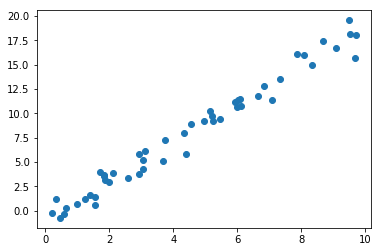

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Choose a class of model

To use the linear regression model, we need to import the linear regression class:

In [3]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters

An important point is that _a class of model is not the same as an instance of a model_.

Depending on the model class, we might be able to customize:

1. Fit for the offset (i.e., y-intercept)

2. Normalization

3. Preprocessing of features to add flexibility to the model

4. Degree of regularization to use in our model

5. Number of model components we would like to use

... and there are **more**...

In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation:

In [5]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. 

Here our target variable y is already in the correct form (a length-<code>n_samples</code> array), but we need to manipulate x to make it a matrix of size <code>[n_samples, n_features]</code>. 

In this case, this amounts to a simple reshaping of the one-dimensional array:

In [6]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to your data

Here is the time to apply our model to data:

In [7]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We can explore the model parameters, by convention ending with an underscore:

In [8]:
model.coef_

array([1.9776566])

In [9]:
model.intercept_

-0.9033107255311092

#### 5. Predict labels for unknown data

Now, based on our model, we want to <code>predict</code> the values of y (dependent variable) based on _new_ values of x (independent variables):

In [10]:
xfit = np.linspace(-1, 11)

First of all, let's get them in a manageable form:

In [11]:
Xfit = xfit[:, np.newaxis]

Now we are ready to predict:

In [13]:
yfit = model.predict(Xfit)

We can finally visualize the results by plotting first the raw data, then the model fit:

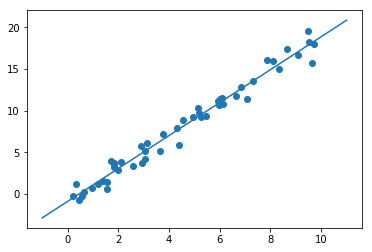

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Supervised learning example: Iris classification

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes.

Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

The first step is to split our dataset in _training set_ and _testing set_. We could do this by hand, or save ourselves some time using <code>train_test_split</code>:

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

Let's follow our step-by-step guide from above:

In [22]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, the moment of truth: checking the accuracy score (the fraction of predicted labels that match their true value):

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it. _(Reminder: currently the dataset has 4 features per sample)_

Here we will use principal component analysis (PCA), a fast dimensionality reduction technique. Our goal is to go from 4 to 2 dimensions.

Usual steps:

In [24]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

Now let's plot the results. A quick way to do this is to insert the results into the original Iris DataFrame, and use Seaborn's <code>lmplot</code> to show the results:

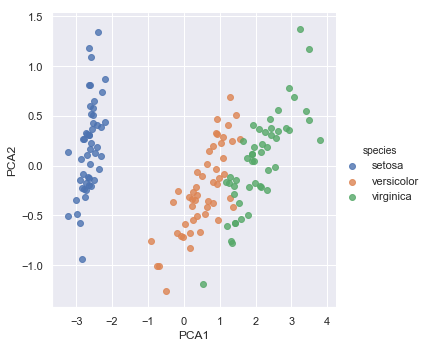

In [25]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised learning: Iris clustering

We will now apply **clustering** to the Iris data. 

A clustering algorithm attempts to find distinct groups of data _without_ reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM).

In [28]:
from sklearn.mixture import GaussianMixture as GMM     # 1. Choose the model class
model = GMM(n_components=3,
            covariance_type='full')              # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                    # 4. Determine cluster labels

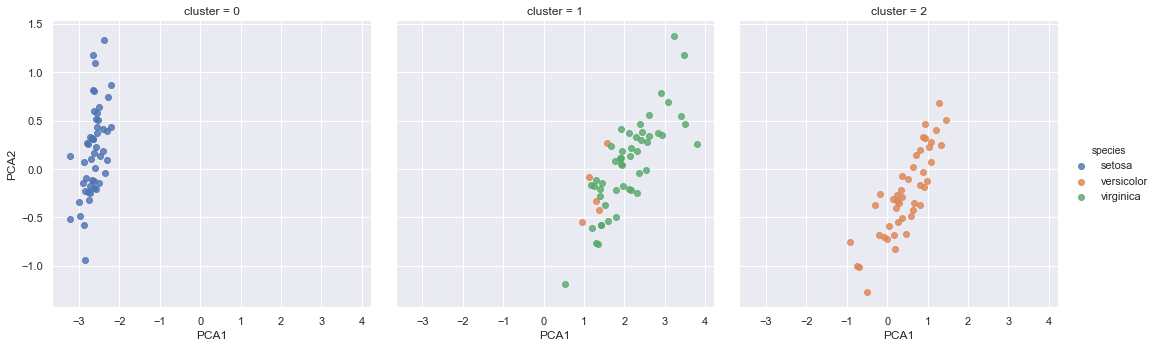

In [29]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

As we can see graphically, the _setosa_ species (cluster 0) was perfectly separated, while it remains a little overlap between _versicolor_ (1) and _virginica_ (2). 

### Application: Exploring Hand-written Digits

Let's try to locate and identify characters in an image, more specifically: digits. Hand-written digits.

### 1. Loading and visualizing the digits data

In [30]:
# built-in dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

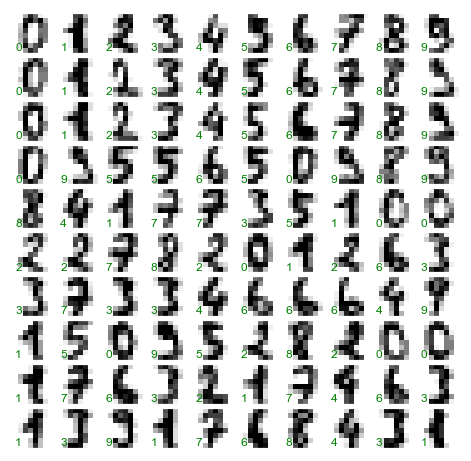

In [31]:
# 1,797 samples each consisting of an 8 × 8 grid of pixels
# first sample of 100
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, <code>[n_samples, n_features]</code> representation.

In order to do so, we can convert each digit in a 64-values array of pixels. Additionally, we need the target array, which gives the previously determined label for each digit.

Both are already provided under the <code>data</code> and <code>target</code> attributes:

In [32]:
X = digits.data
X.shape

(1797, 64)

In [33]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

Here, we'll make use of a manifold learning algorithm called **Isomap** to reduce our dimensions from 64 to 2 and visualize them graphically:

In [34]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

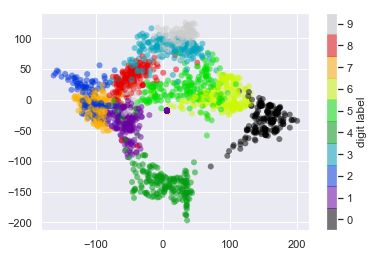

In [38]:
# plotting
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits

As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [40]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Let's now check how accurate it is agains new values:

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

However, this single number doesn't tell us where we've gone wrong—one nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn:

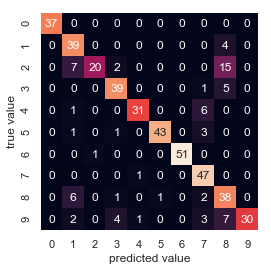

In [42]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We'll use green for correct labels, and red for incorrect labels:

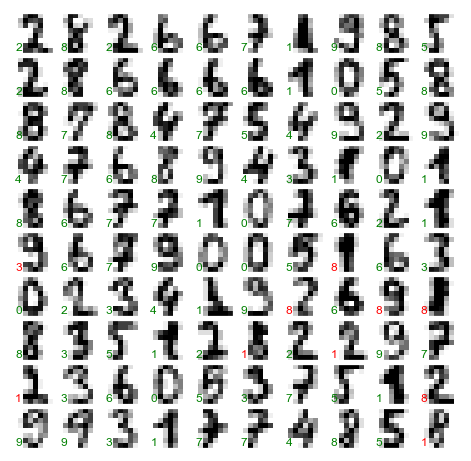

In [43]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')